In [1]:
import os
#os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"

from pprint import pprint
import numpy as np
import tensorflow as tf
import keras
from keras.callbacks import Callback
from tensorflow.python.client import device_lib
from keras.applications import MobileNetV2
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
# from keras.optimizers import SGD
from keras.utils import Sequence

# os.environ["TF_DATA_EXPERIMENTAL_OPTIMIZATION_AUTOTUNE_RAM_BUDGET"] = "18884901888"


gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.9)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("Memory growth enabled for GPUs")
#     except RuntimeError as e:
#         print(f"Error enabling memory growth: {e}")

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.test.is_gpu_available())

# Get detailed device information
print(device_lib.list_local_devices())

2025-01-20 01:12:25.369385: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 01:12:25.409878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-20 01:12:25.409923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-20 01:12:25.411315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 01:12:25.419126: I tensorflow/core/platform/cpu_feature_guar

TensorFlow version: 2.15.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5503346507183623048
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3585127219
locality {
  bus_id: 1
  links {
  }
}
incarnation: 388807383349710745
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2025-01-20 01:12:29.141379: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-20 01:12:29.169666: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-20 01:12:29.170735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
memmap_path='/mnt/Velocity_Vault/Autofocus/Dataset_Storage/'
test_size=47
num_classes=49
patch_num=12

test_dataset = np.memmap(memmap_path+"test_dataset", dtype=np.float64, mode='r', shape=(patch_num*test_size,128, 128,98))
test_truth = np.memmap(memmap_path+"test_truth", dtype=int, mode='r', shape=(patch_num*test_size))

In [4]:
def ordinal_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(tf.square(y_true - y_pred),axis=1)

from keras.models import load_model


model_path='/mnt/Velocity_Vault/Autofocus/Model/Model_V1/model_epoch_2.keras'


model=load_model(model_path,custom_objects={'ordinal_loss': ordinal_loss})

2025-01-20 01:12:40.671125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-20 01:12:40.672275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-20 01:12:40.673231: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
print(test_dataset.shape)

(564, 128, 128, 98)


In [6]:

predictions=np.zeros((47 * 12, 49), dtype=np.float64)


for i in range(12):
    test_temp=test_dataset[i*47:(i+1)*47]
    pred_temp=model.predict(test_temp)
    for j in range(47):
        predictions[i*47+j]=pred_temp[j]

print(predictions.shape)
# pprint(predictions)

2025-01-20 01:12:53.899553: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-01-20 01:12:53.990937: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/2 [==============>...............] - ETA: 1s

2025-01-20 01:12:54.317035: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


2/2 [==============================] - 0s 36ms/step
(564, 49)


In [7]:
def get_max_positions(array):
    # Find the index of the max value along each row
    return np.argmax(array, axis=1)

pred_truth=get_max_positions(predictions)

In [8]:
def calculate_accuracy(array1, array2):
    # Check if both arrays are the same shape
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape")
    
    # Compare the arrays and calculate the accuracy
    correct_predictions = np.sum(array1 == array2)
    total_elements = array1.size
    
    accuracy = correct_predictions / total_elements
    return accuracy*100

pred_test=calculate_accuracy(pred_truth,test_truth)

print("Exact Correctness \n")

print("\nPredicted Truth vs Ground Truth - ",pred_test)



Exact Correctness 


Predicted Truth vs Ground Truth -  0.3546099290780142


In [9]:
pprint(test_truth)
pprint(pred_truth)


memmap([ 8, 14,  5, 13,  5, 12,  1,  7, 12, 10, 13,  5, 12, 12, 12, 16,
        21, 15, 16,  7, 24,  9, 13, 18, 14, 12,  6, 15, 13,  9, 13, 11,
        17, 18, 11, 11,  7, 28, 27, 23, 21, 27, 28, 23, 22, 18, 31, 30,
        12,  8, 17, 20, 19, 19, 20, 13, 33, 27, 23, 19,  8,  7, 22, 34,
        17,  3, 20, 24, 11, 17,  4, 13, 10, 39, 36,  4, 25, 29,  8, 45,
        31, 35, 34, 45, 20, 24, 22, 28, 18, 18, 27, 15, 25, 26, 25, 27,
        28, 20, 29, 22, 21, 23, 18, 17, 29, 20, 17, 17, 18, 19, 18, 17,
        16, 13, 16, 19, 12, 15, 14, 14, 16, 19, 23,  6, 20, 23, 14, 19,
        19, 19, 21, 17, 38, 29, 22, 37, 40,  4, 15,  5, 13, 10, 35, 20,
         9,  7, 23, 18, 22, 12, 23, 12, 23, 17, 17, 20, 19,  9, 14, 14,
         8, 11, 19, 20,  6,  6, 13, 13, 10, 18, 11, 18, 15,  6, 30,  8,
         4, 24, 31, 32, 20, 23, 17, 16, 18, 19, 29, 19, 20, 17, 23, 15,
        22, 19, 20,  9, 16, 13, 14,  4, 11, 17, 28, 14, 21, 34, 21, 23,
        20, 24, 22, 16, 33, 24, 32, 23, 22, 12, 21, 23, 25, 21, 

In [10]:
def calculate_deviation(predictions, ground_truth):
    assert len(predictions) == len(ground_truth), "Prediction and ground truth lists must have the same length."
    
    new_array = (ground_truth - predictions)
    ma=np.max(new_array)
    av=np.mean(new_array)
    
    # Compute squared errors
    squared_errors = [(p - gt) ** 2 for p, gt in zip(predictions, ground_truth)]
    
    # Calculate mean of squared errors
    mse = sum(squared_errors) / len(ground_truth)
    
    return ma,av,mse

ma,av,mse=calculate_deviation(pred_truth,test_truth)

print("Deviation Correctness - Prediction \n")

print('\nMax Deviation - ',ma)
print('\nAvg Deviation - ',av)
print('\nMean Square Deviation - ',mse)

Deviation Correctness - Prediction 


Max Deviation -  12

Avg Deviation -  -20.94858156028369

Mean Square Deviation -  524.9982269503546


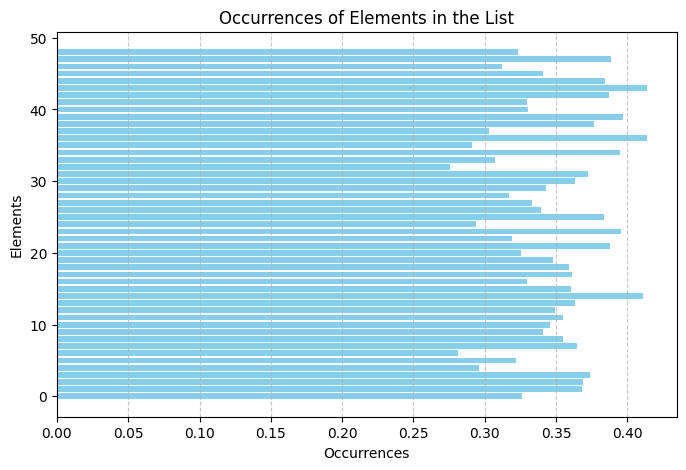

[[0.32615411 0.368404   0.36886582 ... 0.31225279 0.38851145 0.32363573]
 [0.32615408 0.36840397 0.36886582 ... 0.31225279 0.38851145 0.32363573]
 [0.32615411 0.368404   0.36886582 ... 0.31225276 0.38851145 0.32363573]
 ...
 [0.32615405 0.368404   0.36886582 ... 0.31225279 0.38851145 0.32363573]
 [0.32615408 0.36840397 0.36886582 ... 0.31225279 0.38851148 0.32363573]
 [0.32615408 0.36840397 0.36886582 ... 0.31225279 0.38851145 0.32363573]]


In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_occurrences(numbers):
    """
    Plots a horizontal bar graph of the occurrences of elements in a list.

    Parameters:
        numbers (list): A list of numbers to analyze.
    """
    # Count occurrences of each element
    occurrences = Counter(numbers)
    

    # Extract keys (unique numbers) and their corresponding values (counts)
    elements = list(occurrences.keys())
    counts = list(occurrences.values())
    print(np.mean(counts))

    # Plot a horizontal bar graph
    plt.figure(figsize=(8, 5))
    plt.barh(elements, counts, color="skyblue")
    plt.xlabel("Occurrences")
    plt.ylabel("Elements")
    plt.title("Occurrences of Elements in the List")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
    
def plot_frame(pred):
    """
    Plots a horizontal bar graph of the occurrences of elements in a list.

    Parameters:
        numbers (list): A list of numbers to analyze.
    """
    # Count occurrences of each element
    
    ele=[i for i in range(len(pred))]
    # Plot a horizontal bar graph
    plt.figure(figsize=(8, 5))
    plt.barh(ele, pred, color="skyblue")
    plt.xlabel("Occurrences")
    plt.ylabel("Elements")
    plt.title("Occurrences of Elements in the List")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

plot_frame(predictions[2])
print(predictions)
# print(np.sum(predictions, axis=1))